<a href="https://colab.research.google.com/github/Avneet-0001/dynamic_modelling_of_crime/blob/main/Social_interactions_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu = 1.3
K = 10
gamma = 1.9
a = 0.4
H = [0.6,0.3,0.475]

l = 0.2

Ic = [[12,10],[1,3],[2.5,10],[7,12],[11,6],[11.5,2]]

In [ ]:
def f(N,C):
    return mu*N*(1-(N/K)) - a*N*C*h+ l*C
def g(N,C):
    return -gamma*C + a*N*C*h -l*C

In [ ]:
N_l = []
C_l = []
t_l = []

for i in range(0,len(H)):
    h = 1-H[i]
    Nl = []
    Cl = []
    tl = []
    for j in range(0,len(Ic)):
        N,C = Ic[j]
        t = 0; tEnd = 100; dt = 0.001;
        n = int(tEnd/dt)
        N_list = [N]
        C_list = [C]
        t_list = [t]
        for k in range(0,n):
            Nf = (f(N,C)*dt + N)
            Cf = (g(N,C)*dt + C)
            t += dt
            N_list.append(Nf)
            C_list.append(Cf)
            t_list.append(t)
            N = Nf
            C = Cf
        Nl.append(N_list)
        Cl.append(C_list)
        tl.append(t_list)
    N_l.append(Nl)
    C_l.append(Cl)
    t_l.append(tl)

<ipython-input-4-893436001d43>:6: RuntimeWarning: invalid value encountered in divide
  U2, V2 = U/N, V/N


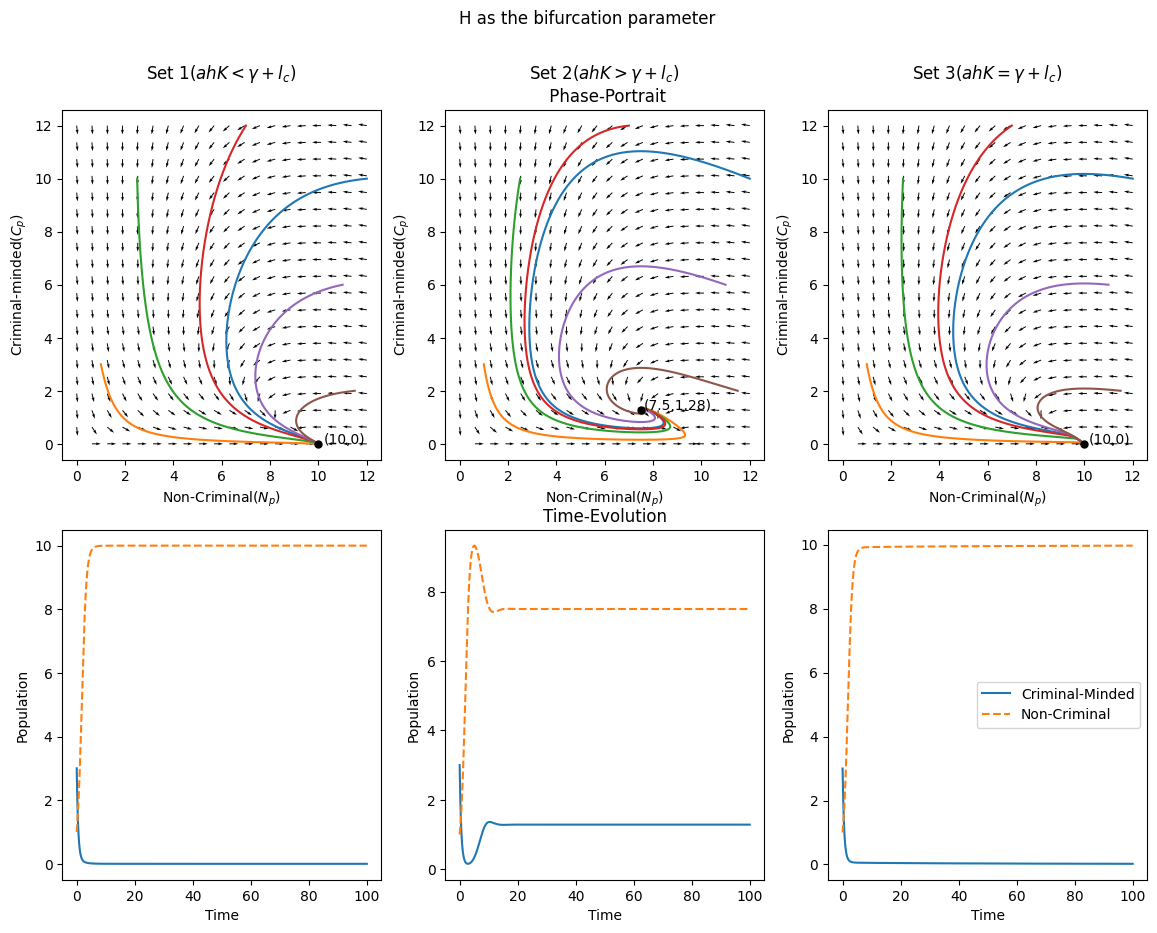

In [ ]:
X,Y = np.meshgrid( np.linspace(0,12,20),np.linspace(0,12,20) )
U = -(mu/K)*X**2+(mu-a*h*Y)*X+l*Y
V = -(gamma+l)*Y+a*h*X*Y

N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N



fig = plt.figure(figsize=(14,10))
fig.suptitle('H as the bifurcation parameter')
ax1 = fig.add_subplot(2,3,1)
ax1.plot(N_l[0][0],C_l[0][0])
ax1.plot(N_l[0][1],C_l[0][1])
ax1.plot(N_l[0][2],C_l[0][2])
ax1.plot(N_l[0][3],C_l[0][3])
ax1.plot(N_l[0][4],C_l[0][4])
ax1.plot(N_l[0][5],C_l[0][5])
ax1.plot(10,0,'.',color='black',markersize=10)
ax1.annotate('(10,0)',xy=(10.2,0))
ax1.quiver( X,Y,U2, V2)
ax1.set_xlabel(r"Non-Criminal$(N_p)$")
ax1.set_ylabel(r"Criminal-minded$(C_p)$")
ax1.set_title(r"Set 1($ahK<\gamma + l_c$)"+'\n')


ax2 = fig.add_subplot(2,3,2)
ax2.plot(N_l[1][0],C_l[1][0])
ax2.plot(N_l[1][1],C_l[1][1])
ax2.plot(N_l[1][2],C_l[1][2])
ax2.plot(N_l[1][3],C_l[1][3])
ax2.plot(N_l[1][4],C_l[1][4])
ax2.plot(N_l[1][5],C_l[1][5])
ax2.quiver( X,Y,U2, V2)
ax2.plot(7.5,1.28,'.',color='black',markersize=10)
ax2.annotate('(7.5,1.28)',xy=(7.6,1.3))
ax2.set_xlabel(r"Non-Criminal$(N_p)$")
ax2.set_ylabel(r"Criminal-minded$(C_p)$")
ax2.set_title(r'Set 2($ahK>\gamma + l_c$)'  + '\n Phase-Portrait')

ax3 = fig.add_subplot(2,3,3)
ax3.plot(N_l[2][0],C_l[2][0])
ax3.plot(N_l[2][1],C_l[2][1])
ax3.plot(N_l[2][2],C_l[2][2])
ax3.plot(N_l[2][3],C_l[2][3])
ax3.plot(N_l[2][4],C_l[2][4])
ax3.plot(N_l[2][5],C_l[2][5])
ax3.quiver( X,Y,U2, V2)
ax3.plot(10,0,'.',color='black',markersize=10)
ax3.annotate('(10,0)',xy=(10.2,0))
ax3.set_xlabel(r"Non-Criminal$(N_p)$")
ax3.set_ylabel(r"Criminal-minded$(C_p)$")
ax3.set_title(r'Set 3($ahK=\gamma + l_c$)'  + '\n ')

ax4 = fig.add_subplot(2,3,4)
ax4.plot(t_l[0][1],C_l[0][1])
ax4.plot(t_l[0][1],N_l[0][1],'--')
ax4.set_xlabel('Time')
ax4.set_ylabel('Population')

ax5 = fig.add_subplot(2,3,5)
ax5.plot(t_l[1][1],C_l[1][1])
ax5.plot(t_l[1][1],N_l[1][1],'--')
ax5.set_xlabel('Time')
ax5.set_ylabel('Population')
ax5.set_title('Time-Evolution')

ax6 = fig.add_subplot(2,3,6)
ax6.plot(t_l[2][1],C_l[2][1],label='Criminal-Minded')
ax6.plot(t_l[2][1],N_l[2][1],'--',label='Non-Criminal')
ax6.set_xlabel('Time')
ax6.set_ylabel('Population')
ax6.legend()
